In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random
import pickle
import util
from copy import deepcopy
from genetic import Population, Chromo

params = util.parse_json('json_files/local_baseline.json')
print params

{u'imigration': 0.0, u'max_not_improved': 10, u'elitism': 0.01, u'crossover': 0.7, u'tour_size': 2, u'mutation': 0.01, u'cross_op': 0, u'local': [1, 6, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], u'max_generations': 100, u'size': 100}


In [20]:
pop = Population( size = params['size'],
        crossover = params['crossover'],
        mutation = params['mutation'],
        elitism = params['elitism'],
        imigration = params['imigration'],
        tour_size = params['tour_size'],
        local = params['local'])

sock = util.open_socket(5000)
Chromo.sock = sock
Chromo.cross_op = params['cross_op']


util.send_msg(sock, 'NEWGEN\n')
best = pop.evaluate()
util.send_msg(sock, 'ENDGEN\n')
util.send_msg(sock, 'ENDGA\n')
sock.close()

evaluate:new_fitness  10408.29
evaluate:new_fitness  9809.26
evaluate:new_fitness  9884.8
evaluate:new_fitness  9741.03
evaluate:new_fitness  10176.62
evaluate:new_fitness  9836.93
evaluate:new_fitness  10000.0
evaluate:new_fitness  10298.62
evaluate:new_fitness  10000.0
evaluate:new_fitness  9842.3
evaluate:new_fitness  9581.0
evaluate:new_fitness  10076.65
evaluate:new_fitness  9471.63
evaluate:new_fitness  10000.0
evaluate:new_fitness  10000.0
evaluate:new_fitness  8619.87
evaluate:new_fitness  10042.99
evaluate:new_fitness  9474.84
evaluate:new_fitness  10322.61
evaluate:new_fitness  10194.51
evaluate:new_fitness  10000.0
evaluate:new_fitness  9826.53
evaluate:new_fitness  10000.0
evaluate:new_fitness  10000.0
evaluate:new_fitness  11459.33
evaluate:new_fitness  10000.0
evaluate:new_fitness  10260.58
evaluate:new_fitness  9903.35
evaluate:new_fitness  10423.66
evaluate:new_fitness  9868.45
evaluate:new_fitness  9609.67
evaluate:new_fitness  10000.0
evaluate:new_fitness  9952.51
eva

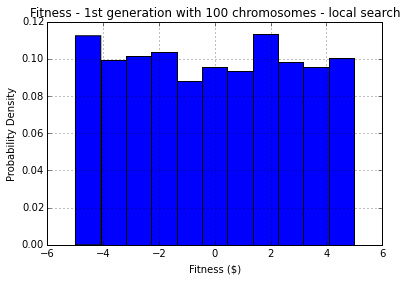

In [37]:
#fitness = [ch[0] for ch in pop.population]
fitness = [random.uniform(-5,5) for i in range(10**3)]
#with open('../slides/images/test.dat', 'r') as infile:
#    fitness = pickle.load(infile)
plt.hist(fitness, bins='auto', normed=1)
plt.grid()
plt.title('Fitness - 1st generation with 100 chromosomes - local search')
plt.ylabel('Probability Density')
plt.xlabel('Fitness ($)')
#plt.savefig('../slides/images/fit_dist_1gen_nolocal.pdf')
#plt.savefig('../slides/images/fit_dist_1gen_yeslocal.pdf')
plt.savefig('../slides/images/test.pdf')
#with open('../slides/images/test.dat', 'w') as outfile:
#    pickle.dump(fitness, outfile)
plt.show()

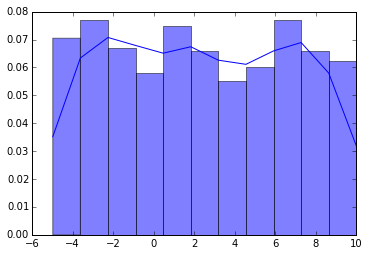

In [62]:
#np.histogram(fitness)
y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='blue', alpha=0.5)
density = stats.gaussian_kde(fitness)
plt.plot(bins,density(bins),'-', color='blue')
#bincenters = 0.5*(bins[1:]+bins[:-1])
#plt.plot(bincenters,y,'--')
plt.subplots_adjust(left=0.15)
plt.show()